In [28]:
import pandas as pd
import numpy as np
# Input pandas and read the btc file using

from pandas import read_csv

df = read_csv('files/btc-market-price.csv')
df.count()

2/4/17 0:00    364
1099.169125    364
dtype: int64

In [6]:
# show the first 10 rows
df.head(2)

,2/4/17 0:00,1099.169125
0,3/4/17 0:00,1141.813
1,4/4/17 0:00,?


In [7]:
# Pandas overwrite the headers, fix that to normal
fixed = read_csv('files/btc-market-price.csv', header=None)
fixed

,0,1
0,2/4/17 0:00,1099.169125
1,3/4/17 0:00,1141.813
2,4/4/17 0:00,?
3,5/4/17 0:00,1133.079314
4,6/4/17 0:00,-
...,...,...
360,28/3/18 0:00,7960.38
361,29/3/18 0:00,7172.28
362,30/3/18 0:00,6882.531667
363,31/3/18 0:00,6935.48


In [8]:
# Treat missing values as not a number(nan)
fixed = read_csv('files/btc-market-price.csv',
         header=None, na_values=['?', '-', ''])
fixed

,0,1
0,2/4/17 0:00,1099.169125
1,3/4/17 0:00,1141.813000
2,4/4/17 0:00,NaN
3,5/4/17 0:00,1133.079314
4,6/4/17 0:00,NaN
...,...,...
360,28/3/18 0:00,7960.380000
361,29/3/18 0:00,7172.280000
362,30/3/18 0:00,6882.531667
363,31/3/18 0:00,6935.480000


In [9]:
# Assign column names with actual names instead of the default
names = ['Timestamp', 'Prices']
fixed = read_csv('files/btc-market-price.csv',
                 names=names,
                 header=None, na_values=['?', '-', ''])

fixed.head(10)

,Timestamp,Prices
0,2/4/17 0:00,1099.169125
1,3/4/17 0:00,1141.813000
2,4/4/17 0:00,NaN
3,5/4/17 0:00,1133.079314
4,6/4/17 0:00,NaN
5,7/4/17 0:00,NaN
6,8/4/17 0:00,1181.149838
7,9/4/17 0:00,1208.800500
8,10/4/17 0:00,1207.744875
9,11/4/17 0:00,1226.617038


In [15]:
# Assign data type(s) for parameters
fixed = read_csv('files/btc-market-price.csv',
                 header=None, na_values=['?','-',''],
                 names=names,
                 dtype={'Price':'float'})
fixed

,Timestamp,Prices
0,2/4/17 0:00,1099.169125
1,3/4/17 0:00,1141.813000
2,4/4/17 0:00,NaN
3,5/4/17 0:00,1133.079314
4,6/4/17 0:00,NaN
...,...,...
360,28/3/18 0:00,7960.380000
361,29/3/18 0:00,7172.280000
362,30/3/18 0:00,6882.531667
363,31/3/18 0:00,6935.480000


In [22]:
# Parse the timeframe to datetime using the two possible options
# Approach 1
fixed['Timestamp'] = pd.to_datetime(fixed.Timestamp)
fixed.dtypes

Timestamp    datetime64[ns]
Prices              float64
dtype: object

In [23]:
# Approach 2
read_csv('files/btc-market-price.csv',
         na_values=['?', '-', ''], names=names,
         parse_dates=['Timestamp'])
fixed.dtypes

Timestamp    datetime64[ns]
Prices              float64
dtype: object

In [25]:
# Override the index of our data
fixed = read_csv('files/btc-market-price.csv',
                 index_col=['Timestamp'],
                 names=names, parse_dates=['Timestamp'],
                 na_values=['?', '-', ' '])

fixed.head(5)

,Prices
Timestamp,
2017-02-04,1099.169125
2017-03-04,1141.813000
2017-04-04,NaN
2017-05-04,1133.079314
2017-06-04,NaN


In [29]:
# Read the crazy mess csv file and use the regex(sep) option on
read_mess = read_csv('files/exam_review.csv')
read_mess.head(5)

,,first_name>last_name>age>math_score>french_score
"Ray>Morley>18>""68","000"">""75","000"""
Melvin>Scott>24>77>83,NaN,NaN
Amirah>Haley>22>92>67,NaN,NaN
"Gerard>Mills>19>""78","000"">72",NaN
Amy>Grimes>23>91>81,NaN,NaN


In [30]:
read_mess = read_csv('files/exam_review.csv',
                     sep='>')
read_mess

,first_name,last_name,age,math_score,french_score
0,Ray,Morley,18,"68,000","75,000"
1,Melvin,Scott,24,77,83
2,Amirah,Haley,22,92,67
3,Gerard,Mills,19,"78,000",72
4,Amy,Grimes,23,91,81


In [42]:
# fix data using the decimal and thousands options
read_mess = read_csv('files/exam_review.csv',
                     decimal=',', sep='>')
read_mess.head(10)

,first_name,last_name,age,math_score,french_score
0,Ray,Morley,18,68.0,75.0
1,Melvin,Scott,24,77.0,83.0
2,Amirah,Haley,22,92.0,67.0
3,Gerard,Mills,19,78.0,72.0
4,Amy,Grimes,23,91.0,81.0


In [43]:
# Get the data type for all columns
read_mess[['math_score', 'french_score']].dtypes

math_score      float64
french_score    float64
dtype: object

In [33]:
# Get the dimension of this file
read_mess.ndim

2

In [39]:
# Skip some rows and play around with that option
read_mess = read_csv('files/exam_review.csv',
                     sep='>', decimal=',', skiprows=3)
read_mess

,Amirah,Haley,22,92,67
0,Gerard,Mills,19,78.0,72
1,Amy,Grimes,23,91.0,81


In [48]:
# skip blank lines with suitable options and vice versa
read_mess = read_csv('files/exam_review.csv',
                     skip_blank_lines=True, sep='>',
                     decimal=',')
read_mess

,first_name,last_name,age,math_score,french_score
0,Ray,Morley,18,68.0,75.0
1,Melvin,Scott,24,77.0,83.0
2,Amirah,Haley,22,92.0,67.0
3,Gerard,Mills,19,78.0,72.0
4,Amy,Grimes,23,91.0,81.0


In [51]:
# Use specific columns, both ways
read_mess = read_csv('files/exam_review.csv',
                     sep='>', skip_blank_lines=True,
                     usecols=['math_score', 'french_score'])
type(read_mess)

pandas.core.frame.DataFrame

In [58]:
# Squeeze data if the return is of one column
read_mess = read_csv('files/exam_review.csv',
                     sep='>', usecols=['french_score'],
                     decimal=',')
mass = read_mess.squeeze()
type(mass)

pandas.core.series.Series

C:\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot: ylabel='math_score'>

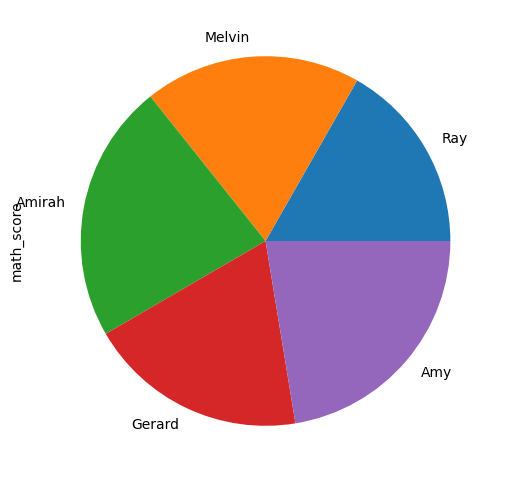

In [88]:
# Do some plotting with pandas, or you may save your data to a new csv file
read_mess = read_csv('files/exam_review.csv',
                     sep='>', skip_blank_lines=True,
                     decimal=',',
                     index_col=['first_name'])
# find the average score of students and plot it

mean_score = read_mess[['math_score', 'french_score']]
avg = np.mean(mean_score)
read_mess['math_score'].plot(kind='pie', figsize=(6,6))

first_name
Ray       71.5
Melvin    80.0
Amirah    79.5
Gerard    75.0
Amy       86.0
dtype: float64

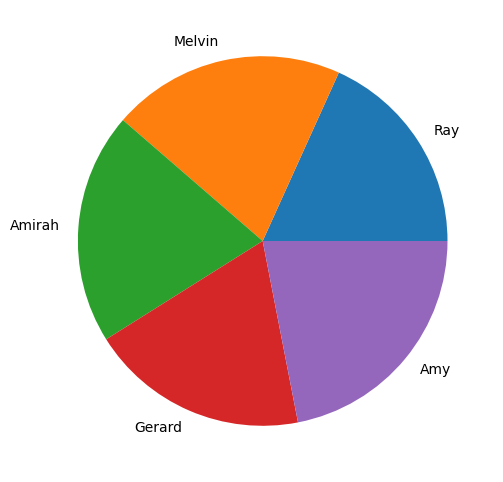

In [96]:
# mean_score = read_mess[['french_score', 'math_score']]
mean_score = (read_mess['math_score'] + read_mess['french_score']) / 2

mean_score.plot(kind='pie', figsize=(6,6))
mean_score

In [97]:
read_mess.to_csv('cleaned')
